In [13]:
import scipy
import scipy.ndimage
from scipy.cluster.vq import vq, kmeans, whiten
from scipy import misc

import numpy as np
import time
import matplotlib.pyplot as plt
import imageio
import PIL
import pickle

### Cuantización escalar

In [ ]:
import numpy as np

# Definir los niveles de cuantización específicos
def quantize_block_indices(block, min_val, max_val, levels):
    step_size = (max_val - min_val) / (levels - 1)
    quantized_indices = np.zeros_like(block, dtype=int)
    
    # Cuantizar cada valor en el bloque
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            quantized_value = round((block[i, j] - min_val) / step_size)
            quantized_indices[i, j] = quantized_value
    
    return quantized_indices

# Bloque de imagen de entrada
block = np.array([[156, 165, 185, 194, 195, 193, 197, 196], [169, 179, 194, 199, 197, 199, 201, 201], [185, 189, 194, 197, 201, 203, 204, 201], [191, 196, 193, 196, 204, 204, 205, 199], [196, 197, 197, 199, 199, 202, 204, 200], [198, 198, 199, 200, 201, 202, 201, 201], [197, 200, 197, 199, 200, 201, 200, 203], [197, 202, 200, 199, 201, 201, 197, 200]])
bits = 3

# Cuantización usando 4 bits (16 niveles)
quantized_indices = quantize_block_indices(block, block.min(), block.max(), pow(2,bits))

print("Indices de cuantizacion:")
print("minimo: " + str(block.min()))
print("minimo: " + str(block.max()))
print(quantized_indices)

**Definid una función** `Dibuja_imagen_cuantizada(imagenCodigo)`
    **que dada una imagen codificada por la función** 
`Cuantizacion_uniforme_adaptativa` **muestre la imagen.**


In [9]:
import numpy as np

def Dibuja_imagen_cuantizada(imagenCodigo):
    # Extraer información de la imagen
    info_imagen = imagenCodigo[0]
    n, m, n_b, b = info_imagen
    
    # Crear una matriz vacía para la imagen desquantizada
    imagen = np.zeros((n, m), dtype=np.uint8)
    
    # Índice de bloques en imagenCodigo
    block_index = 1
    
    for i in range(0, n, n_b):
        for j in range(0, m, n_b):
            # Extraer el bloque codificado y sus límites de cuantización
            min_val, max_val = imagenCodigo[block_index][0]
            bloque_codificado = imagenCodigo[block_index][1]
            
            # Calcular los límites de decisión
            decision_boundaries = np.linspace(min_val, max_val, 2**b + 1)
            
            # Desquantizar el bloque
            for x in range(n_b):
                for y in range(n_b):
                    quantized_value = bloque_codificado[x, y]
                    decoded_value = (decision_boundaries[quantized_value] + decision_boundaries[quantized_value + 1]) / 2
                    imagen[i + x, j + y] = int(decoded_value)
            
            block_index += 1
    
    return imagen

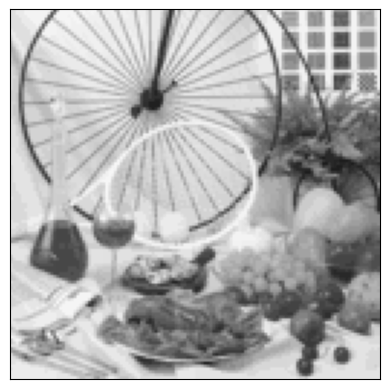

In [14]:
import pickle

with open('./pregunta3.csv', 'rb') as file:
   imagenCodigo = pickle.load(file)

imagen = Dibuja_imagen_cuantizada(imagenCodigo)


plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap=plt.cm.gray,vmin=0, vmax=255)
plt.show()


In [15]:
from math import sqrt,log

def log2(X):
	return log(X,2)

def bits_x_pixel_vectorial(pixelesX,pixelesY,escala,entradas,pixelesB):
    compression_bits = (pixelesX/pixelesB)*(pixelesY/pixelesB)*log2(entradas) + entradas*pixelesB*pixelesB*log2(escala)
    pixel_num = pixelesX*pixelesY
    return compression_bits/pixel_num

# Cuantización vectorial


IMPORTANTE: K-means clustering and vector quantization 

http://docs.scipy.org/doc/scipy/reference/cluster.vq.html

Usad las funciones implementadas, en particular vq y kmeans



**Definid una función** `Dibuja_imagen_cuantizada_KMeans(imagenCodigo)`  **que dada una imagen codificada por la función** 
`Cuantizacion_vectorial_KMeans()` **muestre la imagen codificada.**



In [16]:
import numpy as np

def Dibuja_imagen_cuantizada_KMeans(imagenCodigo):
    # Extraer información de la imagen
    info_imagen = imagenCodigo[0]
    n, m, n_bloque = info_imagen
    
    # Extraer el diccionario y los índices
    diccionario = imagenCodigo[1]
    indices = imagenCodigo[2]
    
    # Crear una matriz vacía para la imagen desquantizada
    imagen = np.zeros((n, m), dtype=np.uint8)
    
    # Número de bloques en la imagen
    num_bloques_horizontales = m // n_bloque
    num_bloques_verticales = n // n_bloque
    
    # Índice de bloques en el array de índices
    block_index = 0
    
    for i in range(num_bloques_verticales):
        for j in range(num_bloques_horizontales):
            # Obtener el índice del diccionario para el bloque actual
            dict_index = indices[block_index]
            
            # Obtener el bloque del diccionario correspondiente
            bloque = diccionario[dict_index]
            
            # Insertar el bloque en la imagen en la posición correspondiente
            fila_inicio = i * n_bloque
            columna_inicio = j * n_bloque
            imagen[fila_inicio:fila_inicio + n_bloque, columna_inicio:columna_inicio + n_bloque] = bloque
            
            block_index += 1
    
    return imagen



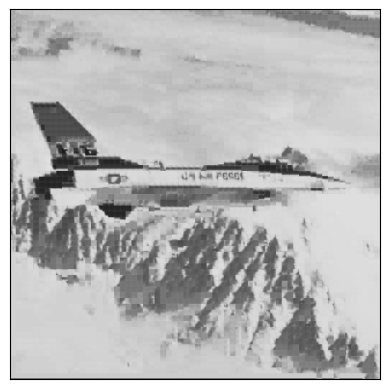

In [17]:
import pickle

with open('./pregunta4.csv', 'rb') as file:
   imagenCodigo = pickle.load(file)

imagen = Dibuja_imagen_cuantizada_KMeans(imagenCodigo)


plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap=plt.cm.gray,vmin=0, vmax=255)
plt.show()

Aplicad vuestras funciones a las imágenes que encontraréis en Atena y haced una estimación de la ratio de compresión.


# Algunas sugerencias que pueden ser útiles

Divido todos los píxeles de la imagen por $q$;

a continuación redondeo todos los píxeles;

a continuación sumo $\frac{1}{2}$ a todos los píxeles de la imagen;

a continuación convierto los valores de todos los píxeles en enteros de 8 bits sin signo;

por último múltiplico todos los píxeles de la imagen por $q$.


In [3]:
bits=3
q=2**(bits) 
imagen2=((np.floor(imagen/q)+1/2).astype(np.uint8))*q

dibujo la imagen cuanzizada resultante

In [3]:
fig=plt.figure()
fig.suptitle('Bloques: '+str(bits)+' bits/píxel')
plt.xticks([])
plt.yticks([])
plt.imshow(imagen2, cmap=plt.cm.gray,vmin=0, vmax=255) 
plt.show()

Lectura y escritura de objetos

In [3]:
import pickle

fichero='QScalar'

with  open(fichero+'_dump.pickle', 'wb') as file:
    pickle.dump(imagenCodigo, file)


with open(fichero, 'rb') as file:
    imagenLeidaCodificada=pickle.load(file)

In [5]:
import pickle

with open('./descarga.csv', 'rb') as file:
   imagenCodigo = pickle.load(file)

Convertir un array en imagen, mostrarla y guardarla en formato png.

La calidad por defecto con que el ecosistema python (ipython, jupyter,...) muestra las imágenes no hace justicia ni a las imágenes originales ni a las obtenidas tras la cuantización.     


In [5]:
import PIL

imagenPIL=PIL.Image.fromarray(imagen)
imagenPIL.show()
imagenPIL.save('imagen.png', 'PNG')